In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
PROJECT_PATH = '../'
DATA_PATH = '/scratch/ceph/swei20/data/ae/dataset/test'
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
NORM_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/norm/spectra.h5'
GRID_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/grid/bosz_5000_4/spectra.h5'

SZALAY_PATH = os.path.join("/scratch/ceph/szalay/swei20/AE", 'pca.h5')
sys.path.insert(0, PROJECT_PATH)

In [470]:
with h5py.File(SZALAY_PATH, 'a') as f:
    f.create_dataset('wave', data = wave, shape = (15404,))  

In [ ]:
with h5py.File(SZALAY_PATH, 'r') as f:
    wave = f['wave'][()]

In [37]:
with h5py.File(NORM_PATH, 'r') as f:
    flux = f['flux'][()]
    mask = f['flux_idx'][()]
#     Fe_H = f['Fe_H'][()]
#     log_g = f['log_g'][()]
#     O_M = f['O_M'][()]
#     C_M = f['C_M'][()]
#     T_eff = f['T_eff'][()]
    wave = f['wave'][()]
#     eigv = f['flux_eigv'][()]
#     eigs = f['flux_eigs'][()]    

In [7]:
np.digitize(10000, T_eff)

27

In [8]:
grid_lowT = flux[:, np.digitize(10000, T_eff) : np.digitize(10000, T_eff) ,...]
mask_lowT = mask[:, : np.digitize(10000, T_eff) ,...]
flux_lowT = grid_lowT[mask_lowT]

In [11]:
grid_lowT.shape, flux_lowT.shape

((14, 27, 11, 6, 4, 15404), (69232, 15404))

In [17]:
from sklearn.decomposition import TruncatedSVD
from matplotlib.colors import LogNorm

In [ ]:

    svd = TruncatedSVD(n_components=self.svd_truncate)
    svd.fit(self.C)
    self.S = svd.singular_values_            # shape: (truncate,)
    self.V = svd.components_.transpose() 

In [ ]:
def get_PC(flux):
    cov = flux.T.dot(flux)    

In [13]:
cov = flux_lowT.T.dot(flux_lowT)

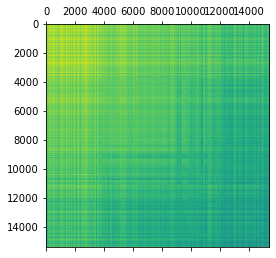

In [19]:
plt.matshow(abs(cov), norm = LogNorm())

In [15]:
svd = TruncatedSVD(n_components=40, n_iter=7, random_state=42)
svd.fit(cov)

TruncatedSVD(n_components=40, n_iter=7, random_state=42)

In [26]:
S = svd.singular_values_
V = svd.components_.transpose()[:, :32]

In [27]:
V.shape

(15404, 32)

In [ ]:
svd.transform(cov)

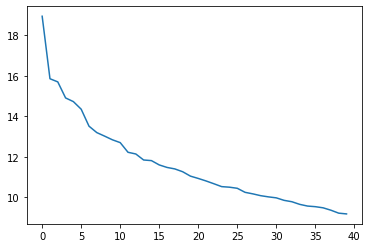

In [22]:
plt.plot(np.log())

In [9]:
flux_lowT.shape

(69232, 15404)

In [ ]:
mask_lowT

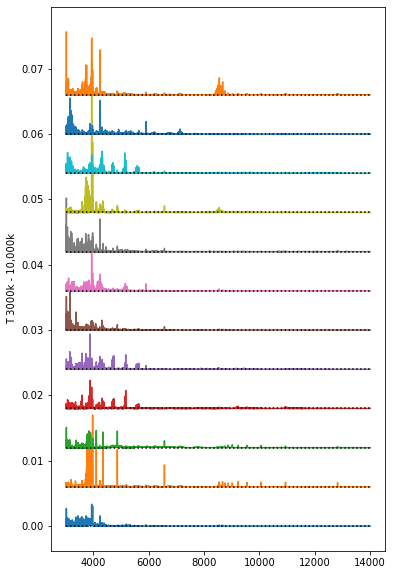

In [44]:
plt.figure(figsize=(6,10))
step = 0.006
for n in range(12):
    plt.plot(wave, V[:,n]**2+n*step)
    plt.plot([wave[0],wave[-1]],[n*step,n*step],'k:')
    plt.ylabel("T 3000k - 10,000k")
plt.show()

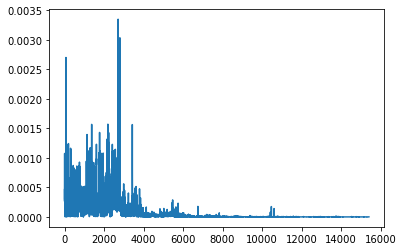

In [31]:
plt.plot(V[:,0]**2)

In [51]:
from lv.pca import PCA

In [53]:
p = PCA(flux, mask)

3it [01:23, 27.87s/it]


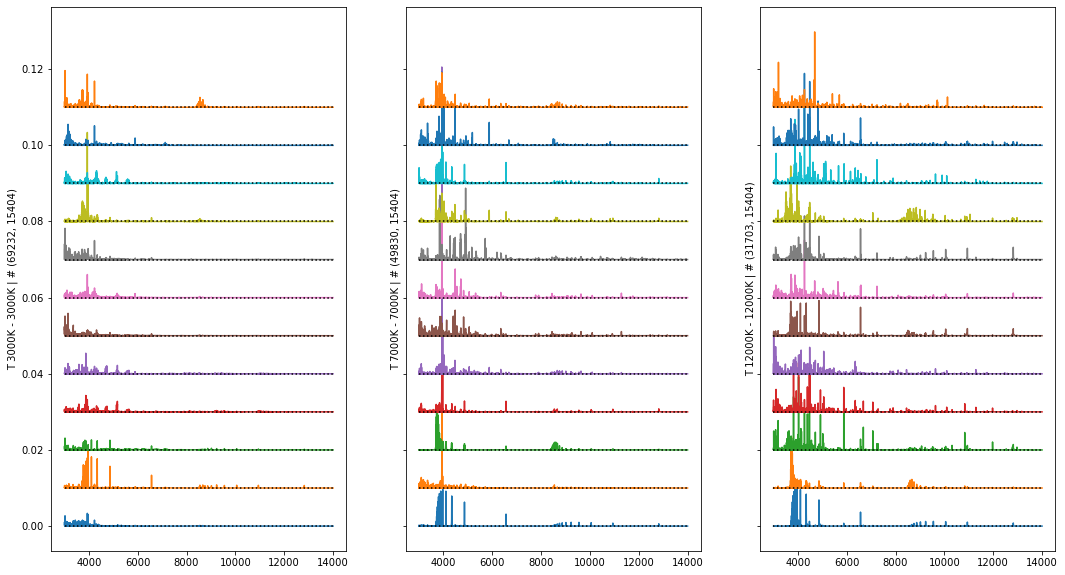

In [66]:
p.plot_all_vs(step=0.01)

In [63]:
p.X[0].shape, p.X[1].shape, p.X[2].shape

((69232, 15404), (49830, 15404), (31703, 15404))

In [69]:
with h5py.File(GRID_PATH, 'r') as f:
    fluxGd = f['flux'][()]
    maskGd = f['flux_idx'][()]
#     Fe_H = f['Fe_H'][()]
#     log_g = f['log_g'][()]
#     O_M = f['O_M'][()]
#     C_M = f['C_M'][()]
#     T_eff = f['T_eff'][()]
    waveGd = f['wave'][()]

In [70]:
waveGd.shape

(21691,)

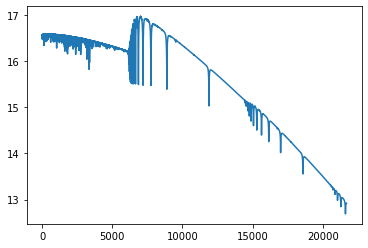

In [76]:
plt.plot(np.log(fluxGd[0,20,10,3,1]))
# plt.yscale('log')

In [77]:
s = np.digitize(3000, waveGd)
e = np.digitize(14000, waveGd)

In [79]:
waveGd[s:e].shape

(15404,)

In [84]:
log_flux = np.log(np.where(fluxGd[..., s:e]<=1., 1, fluxGd[..., s:e]))

MemoryError: Unable to allocate 28.0 GiB for an array with shape (14, 66, 11, 6, 4, 15404) and data type float64

In [80]:
log_flux = np.log(fluxGd[..., s:e])

<ipython-input-80-086e47995be4>:1: RuntimeWarning: divide by zero encountered in log
  log_flux = np.log(fluxGd[..., s:e])


In [81]:
maskGd.shape

(14, 66, 11, 6, 4)

In [ ]:
log_mask = maskGd[]

In [ ]:
p = PCA(flux, mask)